In [20]:
from __future__ import division
from scipy.optimize import curve_fit
from pylab import *
get_ipython().run_line_magic('matplotlib', 'inline')

In [21]:
mm=1e-3
lam=543e-9/mm #wavelength

#### Basic Functions

Function for propegation of Gaussian beam by ABCD matrix method.  See Yariv Quanutum Electronics, or Siegmann Lasers for textbook treatment

In [22]:
def zr(waist):
    #rayleigh range
    return pi*waist**2/lam
def waistz(z,z0,w0):
    #beam waist as function of z
    return w0*sqrt(1+((z-z0)/zr(w0))**2)
def radiusz(z,z0,w0):
    #beam radius of curvature as function of z
    return (z-z0)*(1+((z-z0)/zr(w0))**2)
def q0(w0):
    #q parameter at waist
    return 1j*pi*w0**2/lam
def wfromq(q):
    #convert q back to waist values
    return sqrt(-1*lam/(pi*imag(1/q)))
def propd(q,d):
    #propegaction of q by distance d
    return q+d
def lensf(q,f):
    #action of lens of focal lens f on q
    return q/(-q/f+1)
def qz(z,z0,w0):
    #q parameter at z given w0 at z0
    return propd(q0(w0),z-z0)

#### Find waist from two point measurement

Assume we measure the waist $w_1$ at $z=z_1=0$ and $w_2$ at $z=z_2$, find the location and value of the waist, $z_0,w_0$ (for both x and y)

In [31]:
def findwaist(w,z):
    #curvefit to waist function using p0=[z0,w0] as initial parameters
    if w[0]>w[1]: #if focusing, using second waist as initial parameters
        [z0,w0]=[2*z[1],w[1]]
    else: #if diverging, use first waist
        [z0,w0]=[-z[1],w[0]]
    popt, pcov = curve_fit(waistz,z,w,p0=[z0,w0])
    return popt #return fit paramers [z0,w0]

easured values: (assumes z1=0)

In [32]:
z_measure = [1200,1500,1800] 
w_measure = [0.931/2,1.221/2,1.456/2]    #measured values, w is spot size(diameter) instead of beam waist(radius)
[z0,w0] = findwaist(w_measure,z_measure)
print("x: z0=%0.2f mm and w0=%0.3f mm" %(z0,w0))


x: z0=554.79 mm and w0=0.327 mm


(0.0, 1900.0)

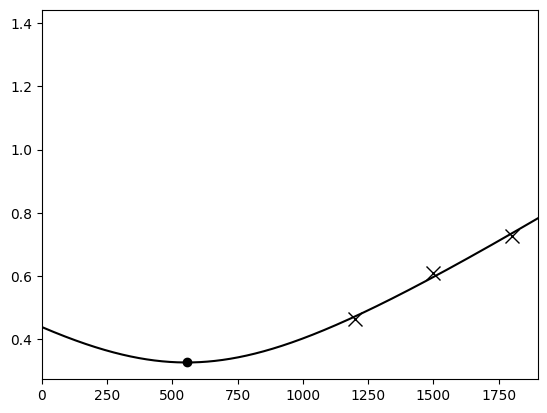

In [34]:
max_dist = 2000 #total propegaction distance in mm
Nsteps = 5000
zlist = linspace(-max_dist,max_dist,Nsteps)
plot(z_measure, w_measure,'kx',markersize=10)
plot(z0,w0,'ko')
plot(zlist,waistz(zlist,z0,w0),'k')
xlim([0,1900])